### Importing the Important Libraries

In [50]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

### Data Visualisation

In [51]:
def plot_images(direction):  
    list_direction=os.listdir(direction)

    plt.figure(figsize=(16,10))

    for i in range(1,10):
        plt.subplot(3,3,i)
        img=plt.imread(os.path.join(direction,list_direction[i]))
        plt.imshow(img, cmap = "gray")

#### Apple Rot Leaves

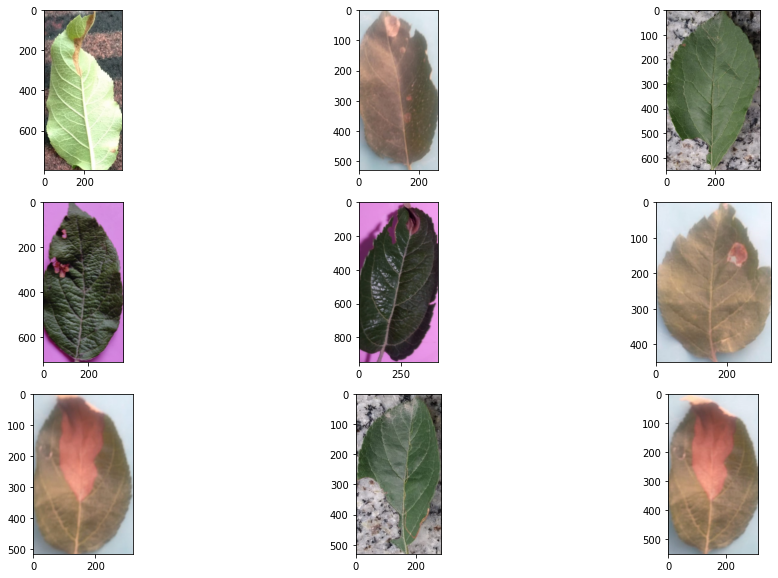

In [52]:
rot_leaves_dir="../input/d-kap/APPLE_DISEASE_DATASET/APPLE ROT LEAVES"
plot_images(rot_leaves_dir)

#### Healthy Leaves

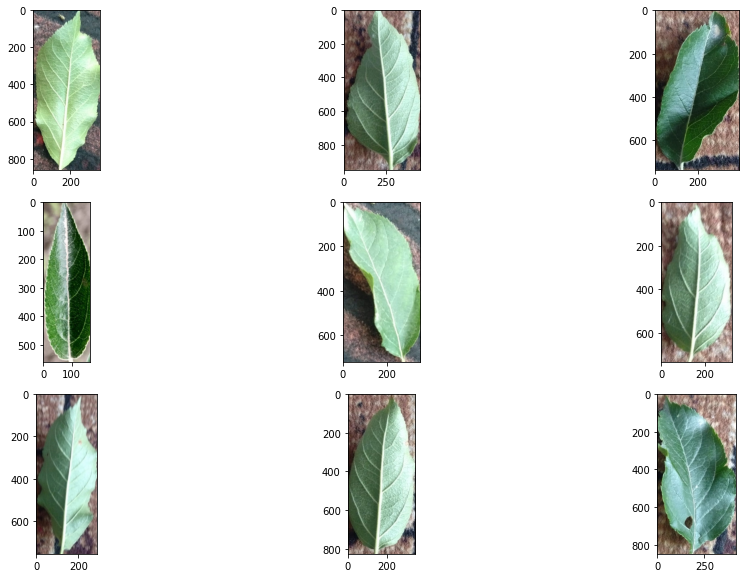

In [53]:
rot_leaves_dir="../input/d-kap/APPLE_DISEASE_DATASET/HEALTHY LEAVES"
plot_images(rot_leaves_dir)

#### Leaf Blotch

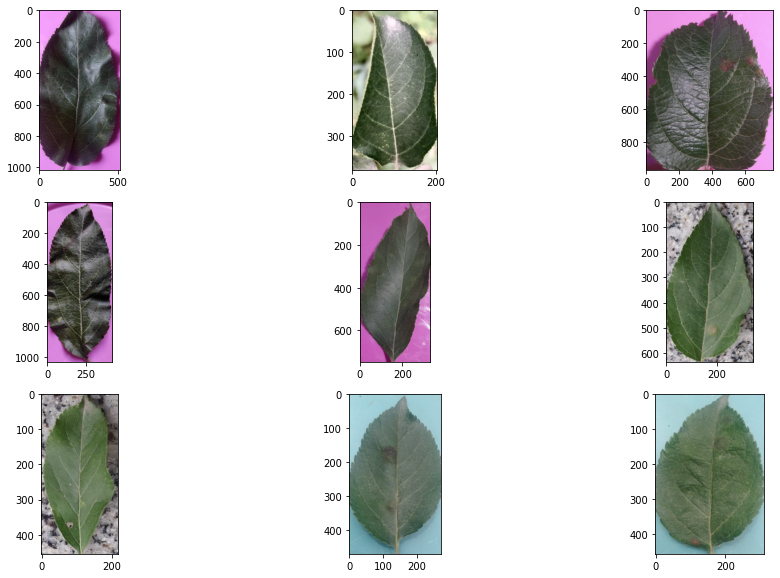

In [54]:
rot_leaves_dir="../input/d-kap/APPLE_DISEASE_DATASET/LEAF BLOTCH"
plot_images(rot_leaves_dir)

#### Scab Leaves

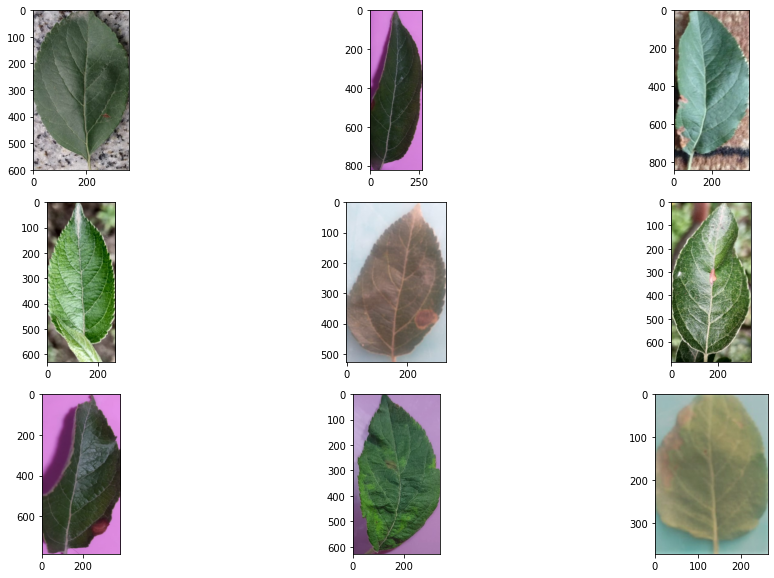

In [55]:
rot_leaves_dir="../input/d-kap/APPLE_DISEASE_DATASET/SCAB LEAVES"
plot_images(rot_leaves_dir)

### Preprocessing

In [56]:
X = []
y = []
image_size = 300
labels = ["APPLE ROT LEAVES","HEALTHY LEAVES","LEAF BLOTCH","SCAB LEAVES"]
for i in labels:
    folderPath = os.path.join("../input/d-kap/APPLE_DISEASE_DATASET",i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X.append(img)
        y.append(i)

X = np.array(X)
y = np.array(y)

In [57]:
y_new = []
for i in y:
    y_new.append(labels.index(i))
y = y_new
y = tf.keras.utils.to_categorical(y)

In [58]:
X.shape

(419, 300, 300, 3)

In [59]:
y.shape

(419, 4)

### Test Train Split

In [60]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X ,y, test_size=.1,random_state=0)

In [61]:
X_train = X_train / 255
X_test = X_test / 255

### Augmentation

In [62]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomContrast(0.5),
    layers.experimental.preprocessing.RandomRotation(0.5),
    layers.experimental.preprocessing.RandomZoom(0.5),
  ]
)

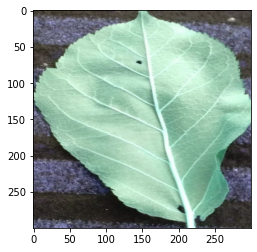

In [63]:
plt.imshow(X[0])
plt.show()

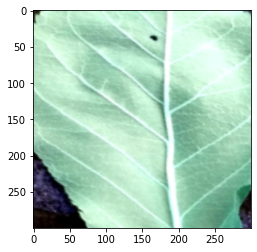

In [64]:
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))
plt.show()

### Model

In [65]:
model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(input_shape = (300,300,3)),
  layers.Dense(1000, activation='relu'),
  layers.Dense(250, activation='relu'),
  layers.Dense(50, activation='relu'),
  layers.Dense(4, activation= 'sigmoid')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train, y_train, epochs=100) 

Epoch 1/100
12/12 [==============================] - 2s 50ms/step - loss: 1.6579 - accuracy: 0.3767
Epoch 2/100
12/12 [==============================] - 1s 48ms/step - loss: 1.3415 - accuracy: 0.3793
Epoch 3/100
12/12 [==============================] - 1s 49ms/step - loss: 1.3265 - accuracy: 0.3793
Epoch 4/100
12/12 [==============================] - 1s 52ms/step - loss: 1.2943 - accuracy: 0.3793
Epoch 5/100
12/12 [==============================] - 1s 51ms/step - loss: 1.2759 - accuracy: 0.3714
Epoch 6/100
12/12 [==============================] - 1s 53ms/step - loss: 1.2238 - accuracy: 0.3873
Epoch 7/100
12/12 [==============================] - 1s 55ms/step - loss: 1.2176 - accuracy: 0.3899
Epoch 8/100
12/12 [==============================] - 1s 49ms/step - loss: 1.2399 - accuracy: 0.3448
Epoch 9/100
12/12 [==============================] - 1s 48ms/step - loss: 1.1937 - accuracy: 0.4271
Epoch 10/100
12/12 [==============================] - 1s 49ms/step - loss: 1.1529 - accuracy: 0.4138

### Evaluate the Model

In [66]:
model.evaluate(X_test,y_test)

2/2 [==============================] - 0s 11ms/step - loss: 1.0216 - accuracy: 0.6667


[1.02156400680542, 0.6666666865348816]